In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [3]:
csv_path = "/Users/danishmir/desktop/737-project/Analysis/oneHot_withCATEGORY.csv"

In [4]:
df=pd.read_csv(csv_path)

In [5]:
df.shape

(961946, 14)

In [6]:
df=df.sample(frac=0.3, random_state=1)# creating random sample from df with 10% data entreis, this is to reduce computation as my machine is unable to handle the data

In [7]:
df.shape

(288584, 14)

In [8]:
df.head(5)

,Unnamed: 0,X,DURATION,HOURLY_WAGE,WAGE_RATE_OF_PAY_FROM_HOUR,WILLFUL_VIOLATOR,OCCUPATION,AGENT_PRESENT_0.0,AGENT_PRESENT_1.0,CASE_STATUS_0.0,CASE_STATUS_1.0,WAGE_RATE_OF_PAY_FROM_HOUR_RANGE,DURATION_RANGE,HOURLY_WAGE_RANGE
759346,759347,759346,6,47.4,47.40,4,computer occupations,1,0,0,1,"(40,50]","(0,10]","(40,50]"
356932,356933,356932,6,20.9,20.94,35,Others,1,0,0,1,"(20,30]","(0,10]","(20,30]"
620091,620092,620091,4,35.7,36.60,9,Financial Occupation,0,1,0,1,"(30,40]","(0,10]","(30,40]"
663836,663837,663836,7,30.6,34.10,49,computer occupations,1,0,0,1,"(30,40]","(0,10]","(30,40]"
257533,257534,257533,6,33.9,34.40,35,computer occupations,0,1,0,1,"(30,40]","(0,10]","(30,40]"


In [9]:
#df['AGENT_PRESENT_0.0'].replace(0, "Absent", inplace=True)#un-encode AGENT_PRESENT

In [10]:
#df["AGENT_PRESENT_0.0"].replace(1, "Present", inplace=True)#un-encode AGENT_PRESENT

In [11]:
#df.head(5)

In [12]:
#df['WORKSITE_STATE']=df['WORKSITE_STATE'].astype('category')

In [13]:
#df['WILLFUL_VIOLATOR']=df['WILLFUL_VIOLATOR'].astype('category')

In [14]:
#df['EMPLOYER_STATE']=df['EMPLOYER_STATE'].astype('category')

In [15]:
#df['CASE_STATUS']=df['CASE_STATUS'].astype('category')

In [16]:
#df['AGENT_PRESENT']=df['AGENT_PRESENT'].astype('category')

In [17]:
df.dtypes

Unnamed: 0                            int64
X                                     int64
DURATION                              int64
HOURLY_WAGE                         float64
WAGE_RATE_OF_PAY_FROM_HOUR          float64
WILLFUL_VIOLATOR                      int64
OCCUPATION                           object
AGENT_PRESENT_0.0                     int64
AGENT_PRESENT_1.0                     int64
CASE_STATUS_0.0                       int64
CASE_STATUS_1.0                       int64
WAGE_RATE_OF_PAY_FROM_HOUR_RANGE     object
DURATION_RANGE                       object
HOURLY_WAGE_RANGE                    object
dtype: object

In [18]:
#lets select some features which we want to use for classifier

In [19]:
cdf = df[['DURATION', 'HOURLY_WAGE', 'AGENT_PRESENT_0.0', 'CASE_STATUS_0.0']]# dropping all categorical values in cdf as k-means is not applicable on categorical variables

In [20]:
#cdf['AGENT_PRESENT_0.0']=cdf['AGENT_PRESENT_0.0'].astype('category')

In [21]:
cdf.head(5)

,DURATION,HOURLY_WAGE,AGENT_PRESENT_0.0,CASE_STATUS_0.0
759346,6,47.4,1,0
356932,6,20.9,1,0
620091,4,35.7,0,0
663836,7,30.6,1,0
257533,6,33.9,0,0


Setting up K-means clustering

In [22]:
cdf.dtypes

DURATION               int64
HOURLY_WAGE          float64
AGENT_PRESENT_0.0      int64
CASE_STATUS_0.0        int64
dtype: object

In [23]:
cdf.columns

Index(['DURATION', 'HOURLY_WAGE', 'AGENT_PRESENT_0.0', 'CASE_STATUS_0.0'], dtype='object')

In [24]:
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [25]:
#Normalizing over the standard deviation
from sklearn.preprocessing import StandardScaler
X = cdf.values
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.05713887,  0.86855142,  1.28222103, -0.20814923],
       [-0.05713887, -1.42337552,  1.28222103, -0.20814923],
       [-0.43691626, -0.14335595, -0.77989674, -0.20814923],
       ...,
       [-1.00658233, -0.09146326,  1.28222103,  4.80424545],
       [-0.05713887,  2.0534344 , -0.77989674, -0.20814923],
       [-0.05713887,  0.4707075 ,  1.28222103, -0.20814923]])

Modeling

Lets apply k-means on our dataset, and take look at cluster labels.

In [26]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 ... 0 1 0]


In [27]:
cdf["Clus_km"] = labels#We assign the labels to each row in dataframe.
cdf.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DURATION,HOURLY_WAGE,AGENT_PRESENT_0.0,CASE_STATUS_0.0,Clus_km
759346,6,47.4,1,0,0
356932,6,20.9,1,0,2
620091,4,35.7,0,0,0
663836,7,30.6,1,0,2
257533,6,33.9,0,0,2


In [28]:
cdf.groupby('Clus_km').mean() #checking the centroid values by averaging the features in each cluster.

,DURATION,HOURLY_WAGE,AGENT_PRESENT_0.0,CASE_STATUS_0.0
Clus_km,,,,
0,6.327654,41.351576,0.380029,0.038689
1,6.354213,60.308904,0.149116,0.036986
2,6.268934,28.938288,0.432597,0.044648


Now, lets look at the distribution of Case Status based on their Duration, Hourly wage, Agent Present:

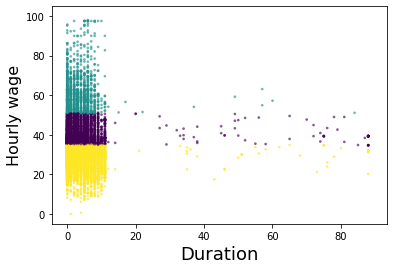

In [29]:
area = np.pi * ( X[:, 3])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Duration', fontsize=18)
plt.ylabel('Hourly wage', fontsize=16)
plt.savefig('k-means-clustering-2d.png', dpi = 300, orientation = 'landscape', transparent=False, bbox_inches='tight')
plt.show()

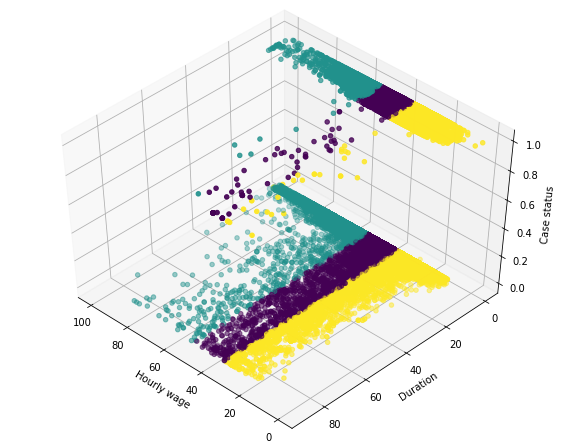

In [30]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Hourly wage')
ax.set_ylabel('Duration')
ax.set_zlabel('Case status')
plt.savefig('3d-k-means-clustering.png', dpi = 300, transparent=False, bbox_inches='tight')
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
plt.savefig('3dk-means-clustering.png', dpi = 300, orientation = 'landscape', transparent=False, bbox_inches='tight')